In [2]:
# Data Handling
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

# Feature Selection & Stats
from scipy.stats import chi2_contingency
import statsmodels.api as sm

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import pickle
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

print("All necessary libraries imported successfully!")


All necessary libraries imported successfully!


In [21]:
df = pd.read_csv("dataset.csv")

In [161]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [128]:
# Display the number of unique values in each column
unique_values = df.nunique()
print(unique_values)


age          41
sex           2
cp            4
trtbps       49
chol        152
fbs           2
restecg       3
thalachh     91
exng          2
oldpeak      40
slp           3
caa           5
thall         4
output        2
dtype: int64


In [129]:
# Get the range (min and max values) for each column
column_range = df.describe().loc[['min', 'max']]
print("\nRange (Min & Max Values):")
print(column_range)


Range (Min & Max Values):
      age  sex   cp  trtbps   chol  fbs  restecg  thalachh  exng  oldpeak  \
min  29.0  0.0  0.0    94.0  126.0  0.0      0.0      71.0   0.0      0.0   
max  77.0  1.0  3.0   200.0  564.0  1.0      2.0     202.0   1.0      6.2   

     slp  caa  thall  output  
min  0.0  0.0    0.0     0.0  
max  2.0  4.0    3.0     1.0  


In [4]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
features_with_na=[features for features in df.columns if df[features].isnull().sum()>=0]
for feature in features_with_na:
    print(feature,np.round(df[feature].isnull().mean()*100,5), '% missing values')


age 0.0 % missing values
sex 0.0 % missing values
cp 0.0 % missing values
trtbps 0.0 % missing values
chol 0.0 % missing values
fbs 0.0 % missing values
restecg 0.0 % missing values
thalachh 0.0 % missing values
exng 0.0 % missing values
oldpeak 0.0 % missing values
slp 0.0 % missing values
caa 0.0 % missing values
thall 0.0 % missing values
output 0.0 % missing values


In [7]:
len(df)

303

In [8]:
# Finding outliers using IQR
Q1 = df.quantile(0.25)  # 25th percentile
Q3 = df.quantile(0.75)  # 75th percentile
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detect outliers
outliers = ((df < lower_bound) | (df > upper_bound)).sum()
print("Number of outliers in each column:\n", outliers)

Number of outliers in each column:
 age          0
sex          0
cp           0
trtbps       9
chol         5
fbs         45
restecg      0
thalachh     1
exng         0
oldpeak      5
slp          0
caa         25
thall        2
output       0
dtype: int64


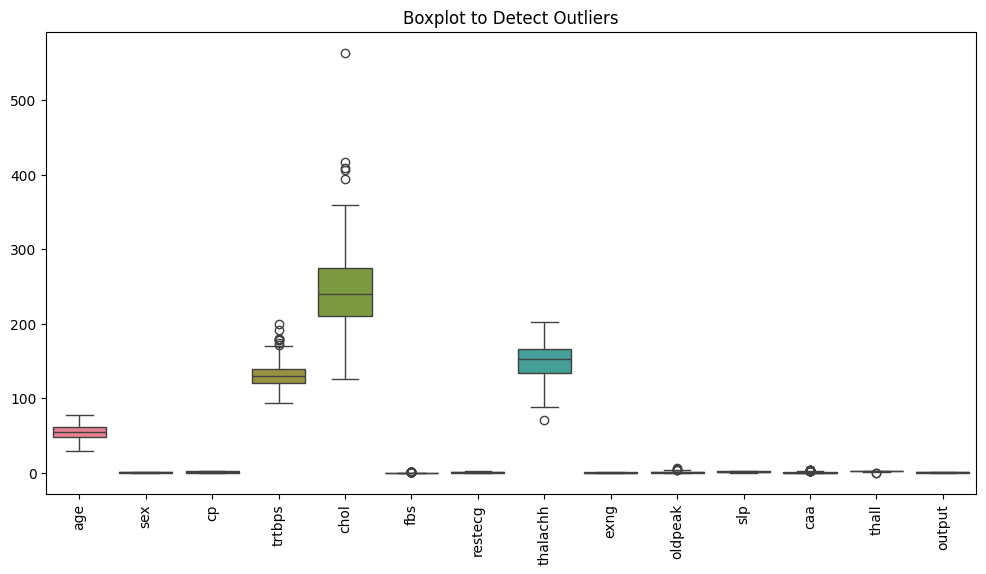

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.title("Boxplot to Detect Outliers")
plt.show()

In [162]:
## Get all numeric features
num_features = [feature for feature in df.columns if df[feature].dtype != 'O']
print(f'Num of Numerical Features: {len(num_features)}\n{num_features}\n')

## Get all categorical features
cat_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print(f'Num of Categorical Features: {len(cat_features)}\n{cat_features}\n')

## Get discrete features (features with ≤ 25 unique values)
discrete_features = [feature for feature in num_features if len(df[feature].unique()) <= 25]
print(f'Num of Discrete Features: {len(discrete_features)}\n{discrete_features}\n')

## Get continuous features (numerical features that are not discrete)
continuous_features = [feature for feature in num_features if feature not in discrete_features]
print(f'Num of Continuous Features: {len(continuous_features)}\n{continuous_features}\n')


Num of Numerical Features: 14
['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output']

Num of Categorical Features: 0
[]

Num of Discrete Features: 9
['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall', 'output']

Num of Continuous Features: 5
['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']



In [165]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
df[continuous_features] = scaler.fit_transform(df[continuous_features])

In [5]:
from preprocessor import Preprocessor  # Import the class

preprocessor = Preprocessor()
df_transformed = preprocessor.fit_transform(df)

with open("preprocessor.pkl", "wb") as file:
    pickle.dump(preprocessor, file)

print("Preprocessing pipeline saved successfully!")


Preprocessing pipeline saved successfully!


In [7]:
# Apply transformations using the preprocessor
df = preprocessor.transform(df)


In [8]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,0.592593,1,3,0.75,-0.110236,1,0,-0.092308,0,0.9375,0,0,1,1
1,-1.333333,1,2,0.00,0.157480,0,1,1.046154,0,1.6875,0,0,2,1
2,-1.037037,0,1,0.00,-0.566929,0,0,0.584615,0,0.3750,2,0,2,1
3,0.074074,1,1,-0.50,-0.062992,0,1,0.769231,0,0.0000,2,0,2,1
4,0.148148,0,0,-0.50,1.795276,0,1,0.307692,1,-0.1250,2,0,2,1


In [72]:
# Count unique values and list unique categories for each discrete feature
discrete_feature_info = {feature: df[feature].unique().tolist() for feature in discrete_features}

# Print the results
for feature, categories in discrete_feature_info.items():
    print(f'Feature: {feature} | Unique Categories: {len(categories)} | Categories: {categories}')

Feature: sex | Unique Categories: 2 | Categories: [1, 0]
Feature: cp | Unique Categories: 4 | Categories: [3, 2, 1, 0]
Feature: fbs | Unique Categories: 2 | Categories: [1, 0]
Feature: restecg | Unique Categories: 3 | Categories: [0, 1, 2]
Feature: exng | Unique Categories: 2 | Categories: [0, 1]
Feature: slp | Unique Categories: 3 | Categories: [0, 2, 1]
Feature: caa | Unique Categories: 5 | Categories: [0, 2, 1, 3, 4]
Feature: thall | Unique Categories: 4 | Categories: [1, 2, 3, 0]
Feature: output | Unique Categories: 2 | Categories: [1, 0]


In [167]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,0.592593,1,3,0.75,-0.110236,1,0,-0.092308,0,0.9375,0,0,1,1
1,-1.333333,1,2,0.00,0.157480,0,1,1.046154,0,1.6875,0,0,2,1
2,-1.037037,0,1,0.00,-0.566929,0,0,0.584615,0,0.3750,2,0,2,1
3,0.074074,1,1,-0.50,-0.062992,0,1,0.769231,0,0.0000,2,0,2,1
4,0.148148,0,0,-0.50,1.795276,0,1,0.307692,1,-0.1250,2,0,2,1


In [168]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    precision_score, recall_score, f1_score, roc_auc_score, classification_report, 
    confusion_matrix, ConfusionMatrixDisplay, roc_curve)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support, classification_report


# Splitting Features & Target
X = df.drop(columns=["output"])  # Features
y = df["output"]  # Target

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [171]:
X_train.shape, X_test.shape

((242, 13), (61, 13))

In [172]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    float64
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
dtypes: float64(5), int64(8)
memory usage: 30.9 KB


In [173]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score

# 🚀 Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}

# 🚀 Dictionary to store results
results = {}

# 🚀 Loop through each model
for name, model in models.items():
    print(f"\n🔹 Training & Evaluating: {name}")

    # Train model
    model.fit(X_train, y_train)

    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # 📊 Training Metrics
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_f1 = f1_score(y_train, y_train_pred, average='weighted')
    train_precision = precision_score(y_train, y_train_pred)
    train_recall = recall_score(y_train, y_train_pred)
    train_rocauc = roc_auc_score(y_train, y_train_pred)

    # 📊 Testing Metrics
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred, average='weighted')
    test_precision = precision_score(y_test, y_test_pred)
    test_recall = recall_score(y_test, y_test_pred)
    test_rocauc = roc_auc_score(y_test, y_test_pred)

    # Store results
    results[name] = {
        "Train Accuracy": train_accuracy, "Train F1": train_f1, "Train Precision": train_precision, 
        "Train Recall": train_recall, "Train ROC-AUC": train_rocauc,
        "Test Accuracy": test_accuracy, "Test F1": test_f1, "Test Precision": test_precision, 
        "Test Recall": test_recall, "Test ROC-AUC": test_rocauc
    }

# 🚀 Convert results to a DataFrame for easy comparison
df_results = pd.DataFrame(results).T

# 🚀 Display results
print("\n📌 Model Performance Summary:")
print(df_results)



🔹 Training & Evaluating: Logistic Regression

🔹 Training & Evaluating: Decision Tree

🔹 Training & Evaluating: Random Forest

🔹 Training & Evaluating: Gradient Boosting

📌 Model Performance Summary:
                     Train Accuracy  Train F1  Train Precision  Train Recall  \
Logistic Regression        0.847107  0.845894         0.827586      0.909091   
Decision Tree              1.000000  1.000000         1.000000      1.000000   
Random Forest              1.000000  1.000000         1.000000      1.000000   
Gradient Boosting          0.995868  0.995866         0.992481      1.000000   

                     Train ROC-AUC  Test Accuracy   Test F1  Test Precision  \
Logistic Regression       0.840909       0.803279  0.799672        0.769231   
Decision Tree             1.000000       0.688525  0.684224        0.684211   
Random Forest             1.000000       0.819672  0.815437        0.775000   
Gradient Boosting         0.995455       0.819672  0.817182        0.789474   

   

### 📌 Selected Model: random forest 


#### Highest Recall
#### Good Precision 
#### Balanced Performance → Optimal trade-off between Recall & Precision.

In [174]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# 🚀 Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}

# 🚀 Define hyperparameter grids for each model (example)
param_grids = {
    "Logistic Regression": {'C': [0.001, 0.01, 0.1, 1, 10]},
    "Decision Tree": {'max_depth': [3, 5, 10, None], 'min_samples_split': [2, 5, 10]},
    "Random Forest": {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 10]},
    "Gradient Boosting": {'n_estimators': [50, 100], 'learning_rate': [0.01, 0.1], 'max_depth': [3, 5]}
}

# 🚀 Dictionary to store results
results = {}

# 🚀 Stratified K-Fold cross-validation setup
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 🚀 Loop through each model
for name, model in models.items():
    print(f"\n🔹 Training & Evaluating: {name}")

    # 🚀 Hyperparameter tuning with GridSearchCV
    grid_search = GridSearchCV(estimator=model, param_grid=param_grids[name], cv=cv, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # Get best model from grid search
    best_model = grid_search.best_estimator_
    
    # Get best hyperparameters
    best_params = grid_search.best_params_
    print(f"Best Parameters for {name}: {best_params}")

    # Predictions
    y_train_pred = best_model.predict(X_train)
    y_test_pred = best_model.predict(X_test)

    # 📊 Training Metrics
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_f1 = f1_score(y_train, y_train_pred, average='weighted')
    train_precision = precision_score(y_train, y_train_pred)
    train_recall = recall_score(y_train, y_train_pred)
    train_rocauc = roc_auc_score(y_train, y_train_pred)

    # 📊 Testing Metrics
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred, average='weighted')
    test_precision = precision_score(y_test, y_test_pred)
    test_recall = recall_score(y_test, y_test_pred)
    test_rocauc = roc_auc_score(y_test, y_test_pred)

    # Store results
    results[name] = {
        "Best Params": best_params,
        "Train Accuracy": train_accuracy, "Train F1": train_f1, "Train Precision": train_precision, 
        "Train Recall": train_recall, "Train ROC-AUC": train_rocauc,
        "Test Accuracy": test_accuracy, "Test F1": test_f1, "Test Precision": test_precision, 
        "Test Recall": test_recall, "Test ROC-AUC": test_rocauc
    }


🔹 Training & Evaluating: Logistic Regression
Best Parameters for Logistic Regression: {'C': 0.01}

🔹 Training & Evaluating: Decision Tree
Best Parameters for Decision Tree: {'max_depth': 3, 'min_samples_split': 2}

🔹 Training & Evaluating: Random Forest
Best Parameters for Random Forest: {'max_depth': 5, 'n_estimators': 50}

🔹 Training & Evaluating: Gradient Boosting
Best Parameters for Gradient Boosting: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
from sklearn.model_selection import StratifiedKFold

# 🚀 Define models with best parameters
best_models = {
    "Logistic Regression": LogisticRegression(C=0.01),
    "Decision Tree": DecisionTreeClassifier(max_depth=3, min_samples_split=2),
    "Random Forest": RandomForestClassifier(max_depth=5, n_estimators=50),
    "Gradient Boosting": GradientBoostingClassifier(learning_rate=0.1, max_depth=3, n_estimators=100)
}

# 🚀 Dictionary to store results
results = {}

# 🚀 Stratified K-Fold cross-validation setup
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 🚀 Loop through each model
for name, model in best_models.items():
    print(f"\n🔹 Training & Evaluating: {name}")

    # Train the model
    model.fit(X_train, y_train)

    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # 📊 Training Metrics
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_f1 = f1_score(y_train, y_train_pred, average='weighted')
    train_precision = precision_score(y_train, y_train_pred)
    train_recall = recall_score(y_train, y_train_pred)
    train_rocauc = roc_auc_score(y_train, y_train_pred)

    # 📊 Testing Metrics
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred, average='weighted')
    test_precision = precision_score(y_test, y_test_pred)
    test_recall = recall_score(y_test, y_test_pred)
    test_rocauc = roc_auc_score(y_test, y_test_pred)

    # Store results
    results[name] = {
        "Train Accuracy": train_accuracy, "Train F1": train_f1, "Train Precision": train_precision, 
        "Train Recall": train_recall, "Train ROC-AUC": train_rocauc,
        "Test Accuracy": test_accuracy, "Test F1": test_f1, "Test Precision": test_precision, 
        "Test Recall": test_recall, "Test ROC-AUC": test_rocauc
    }

# 🚀 Convert results to a DataFrame for easy comparison
df_results = pd.DataFrame(results).T

# 🚀 Display results
print("\n📌 Model Performance Summary:")
print(df_results)



🔹 Training & Evaluating: Logistic Regression

🔹 Training & Evaluating: Decision Tree

🔹 Training & Evaluating: Random Forest

🔹 Training & Evaluating: Gradient Boosting

📌 Model Performance Summary:
                     Train Accuracy  Train F1  Train Precision  Train Recall  \
Logistic Regression        0.834711  0.831478         0.794872      0.939394   
Decision Tree              0.847107  0.846367         0.836879      0.893939   
Random Forest              0.950413  0.950269         0.934783      0.977273   
Gradient Boosting          0.995868  0.995866         0.992481      1.000000   

                     Train ROC-AUC  Test Accuracy   Test F1  Test Precision  \
Logistic Regression       0.824242       0.803279  0.794838        0.744186   
Decision Tree             0.842424       0.754098  0.752485        0.750000   
Random Forest             0.947727       0.836066  0.831266        0.780488   
Gradient Boosting         0.995455       0.819672  0.817182        0.789474   

   

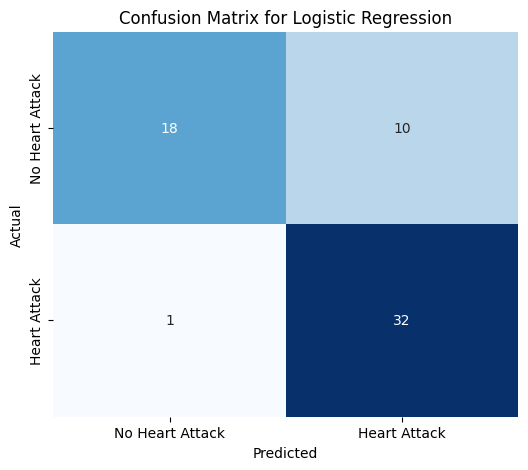

In [176]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# 🚀 Train Logistic Regression with best parameters
Rm_best = RandomForestClassifier(max_depth=5, n_estimators=50)
Rm_best.fit(X_train, y_train)

# 🚀 Make predictions
y_test_pred = Rm_best.predict(X_test)

# 🚀 Generate confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# 🚀 Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Heart Attack', 'Heart Attack'],
            yticklabels=['No Heart Attack', 'Heart Attack'])

plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
# 🚀 Save the trained Logistic Regression model using pickle
with open('rm_best_model.pkl', 'wb') as file:
    pickle.dump(Rm_best, file)

print("Model saved as 'best_model.pkl'")

Model saved as 'best_model.pkl'


In [26]:
df = pd.read_csv("dataset.csv")

In [27]:
# Load the saved preprocessor
with open("preprocessor.pkl", "rb") as file:
    preprocessor = pickle.load(file)

In [28]:
# Apply transformations using the preprocessor
df_transform = preprocessor.transform(df)

In [29]:
df_transform.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,0.592593,1,3,0.75,-0.110236,1,0,-0.092308,0,0.9375,0,0,1,1
1,-1.333333,1,2,0.00,0.157480,0,1,1.046154,0,1.6875,0,0,2,1
2,-1.037037,0,1,0.00,-0.566929,0,0,0.584615,0,0.3750,2,0,2,1
3,0.074074,1,1,-0.50,-0.062992,0,1,0.769231,0,0.0000,2,0,2,1
4,0.148148,0,0,-0.50,1.795276,0,1,0.307692,1,-0.1250,2,0,2,1


In [30]:
# Load the saved model
with open("rm_best_model.pkl", "rb") as file:
    best_model = pickle.load(file)

print("Model loaded successfully!")

Model loaded successfully!


In [31]:
# Splitting Features & Target
X = df_transform.drop(columns=["output"])  # Features
y = df_transform["output"]  # Target

In [32]:
# Make predictions
predictions = best_model.predict(X)

# Add predictions to the dataframe
X["Predictions"] = predictions